In [1]:
import numpy as np
import numpy.random as npr

In [3]:
n1 = 38
n2 = 22
sd1 = 1.11
sd2 = 1.84
m1 = 0
m2 = 0

In [38]:
trueD = (m2-m1)/(np.sqrt(((n1-1)*sd1**2+(n2-1)*sd1**2))/(n1+n2-2))
trueD

0.0

In [5]:
sim_x1 = npr.normal(m1,sd1,n1)
sim_x2 = npr.normal(m2,sd2,n2)

In [6]:
import scipy.stats as sp

In [7]:
sp.ttest_ind(sim_x1, sim_x2, equal_var=True)

Ttest_indResult(statistic=-0.6721083328844798, pvalue=0.5041833854854809)

In [8]:
sp.ttest_ind(sim_x1, sim_x2, equal_var=False)

Ttest_indResult(statistic=-0.617211214022796, pvalue=0.5412207316100013)

In [9]:
import pingouin as pg

In [10]:
pg.ttest(sim_x1, sim_x2, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.672108,58,two-sided,0.504183,"[-0.96, 0.48]",0.180058,0.326,0.101368


In [11]:
pg.ttest(sim_x1, sim_x2, correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.617211,33.887542,two-sided,0.541221,"[-1.04, 0.55]",0.180058,0.317,0.101368


In [14]:
import statsmodels.stats.weightstats as sm

In [15]:
sm.ttest_ind(sim_x1, sim_x2, usevar="pooled")

(-0.6721083328844799, 0.5041833854854807, 58.0)

In [16]:
sm.ttest_ind(sim_x1, sim_x2, usevar="unequal")

(-0.617211214022796, 0.5412207316100013, 33.887542012848286)

In [17]:
sp.levene(sim_x1, sim_x2, center='mean')

LeveneResult(statistic=1.4135290185914453, pvalue=0.23931640598747292)

In [18]:
nSim = 5000
pt = []
pw = []
pl = []
for i in range(nSim):
    sim_x1 = npr.normal(m1,sd1,n1)
    sim_x2 = npr.normal(m2,sd2,n2)
    pt.append(sm.ttest_ind(sim_x1, sim_x2, usevar="pooled")[1])
    pw.append(sm.ttest_ind(sim_x1, sim_x2, usevar="unequal")[1])
    pl.append(sp.levene(sim_x1, sim_x2, center='mean')[1])

In [19]:
import matplotlib.pyplot as plt

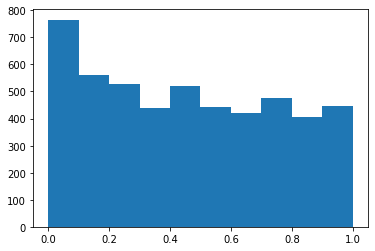

In [22]:
plt.hist(pt);

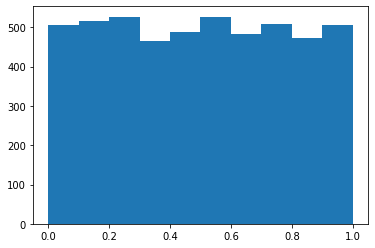

In [23]:
plt.hist(pw);

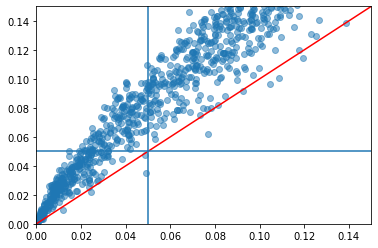

In [32]:
plt.scatter(pt,pw, alpha=0.5)
plt.xlim([0,0.15])
plt.ylim([0,0.15])
x = np.linspace(0,1)
y = np.linspace(0,1)
plt.plot(x,y,color='red')
plt.axhline(y=0.05) 
plt.axvline(x=0.05) 

In [34]:
power_l = sum(np.array(pl)<0.05)/nSim*100
power_l

67.38

In [35]:
error1_t = sum(np.array(pt)<0.05)/nSim*100
error1_t

8.4

In [37]:
error1_w = sum(np.array(pw)<0.05)/nSim*100
error1_w

5.26